## Aufgabe 1 Aufgabenteil 2
### 2.1

As we are using only the training data split the numbers may vary if the split is regenerated. This happens because the rows are split randomly into test, training and validation.

In [5]:
import pandas as pd

data = pd.read_pickle('./files/train.pickle')

imdb_score_mean = data['imdb_score'].mean()
imdb_score_std = data['imdb_score'].std()
imdb_votes_mean = data['imdb_votes'].mean()
imdb_votes_std = data['imdb_votes'].std()

print(f'imdb score:\n  mean: {round(imdb_score_mean, 2)}\n  standard deviation: {round(imdb_score_std, 2)}')
print(f'imdb votes:\n  mean: {round(imdb_votes_mean, 2)}\n  standard deviation: {round(imdb_votes_std, 2)}')

imdb score:
  mean: 6.55
  standard deviation: 1.18
imdb votes:
  mean: 21739.06
  standard deviation: 81203.5


### 2.2

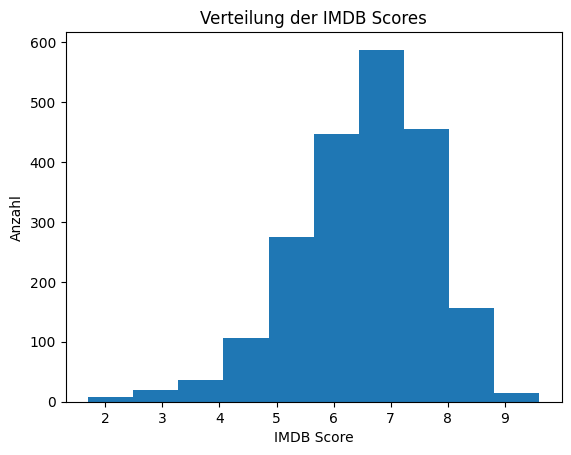

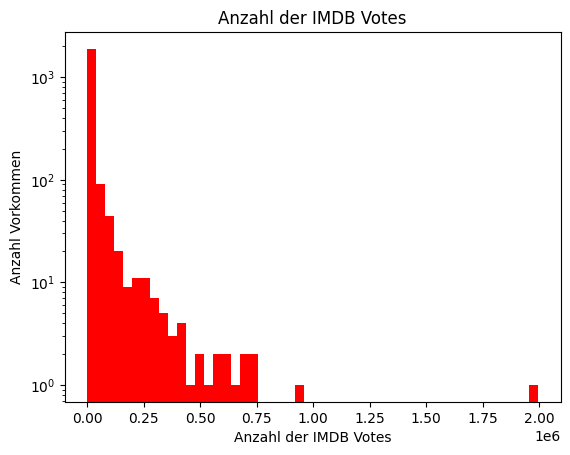

In [6]:
import pandas as pd
import matplotlib.pyplot as plot

data = pd.read_pickle('./files/train.pickle')

#imdb score histogram
plot.hist(data['imdb_score'], bins=10)
plot.title('Verteilung der IMDB Scores')
plot.xlabel('IMDB Score')
plot.ylabel('Anzahl')
plot.show()

#imdb votes histogram
plot.hist(data['imdb_votes'], bins=50,histtype='stepfilled', color='red')

#set y-axis to logarithmic scale (makes it easier to see the distribution)
plot.yscale('log')

plot.title('Anzahl der IMDB Votes')
plot.xlabel('Anzahl der IMDB Votes')
plot.ylabel('Anzahl Vorkommen')
plot.show()

### 2.3

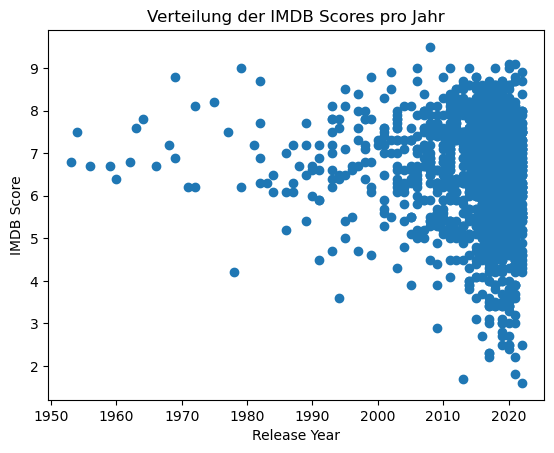

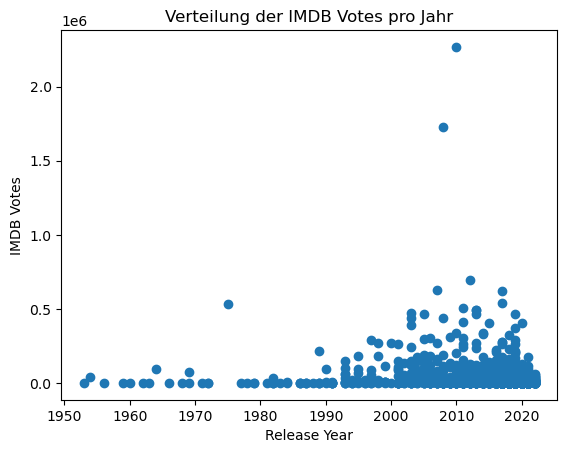

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# open train data from preprocessing 
with open('./files/train.pickle', 'rb') as f:
    netflix_data = pd.read_pickle(f)
    
# removing invalid release_year values
netflix_data = netflix_data[pd.to_numeric(netflix_data['release_year'], errors='coerce').notnull()]

# creating first scatter plot for IMDB scores
plt.scatter(netflix_data['release_year'].astype('int'), netflix_data['imdb_score'])
plt.title('Verteilung der IMDB Scores pro Jahr')
plt.xlabel('Release Year')
plt.ylabel('IMDB Score')
plt.show()

# creating second scatter plot for IMDB votes
plt.scatter(netflix_data['release_year'].astype('int'), netflix_data['imdb_votes'])
plt.title('Verteilung der IMDB Votes pro Jahr')
plt.xlabel('Release Year')
plt.ylabel('IMDB Votes')
plt.show()

### 2.4

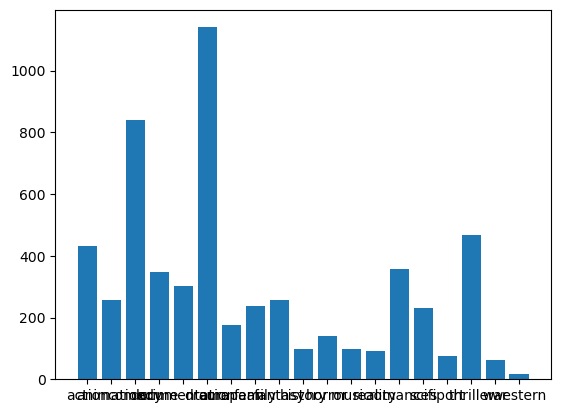

In [21]:
import matplotlib.pyplot as plot
import pandas as pd

data = pd.read_pickle('./files/train.pickle')

names = data.iloc[:, 9:].columns

values = []
for c in names:
    values.append(data[c].sum())
    
fix, ax = plot.subplots()

ax.bar(names, values)

plot.show()

### 2.5

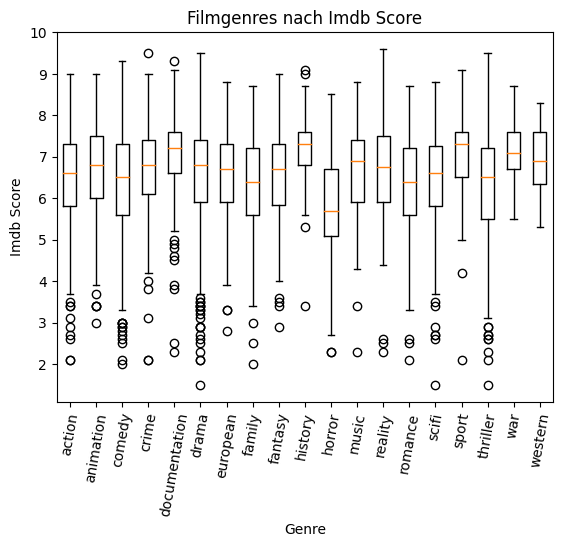

In [81]:
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np

data = pd.read_pickle('./files/train.pickle')

category_names = data.iloc[:, 9:].columns

columns = []

for category_name in category_names:
    category = data.loc[data[category_name] == 1]
    columns.append(category['imdb_score'])

fig, ax = plot.subplots()

ax.boxplot(columns)

ax.set_title('Filmgenres nach Imdb Score')
ax.set_ylabel('Imdb Score')
ax.set_xlabel('Genre')

category_size = np.arange(1, 20, 1)
plot.xticks(category_size, category_names, rotation=80)
plot.show()

